#Importing


In [36]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import  matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
data = pd.read_csv("/content/drive/MyDrive/SampledData.csv")

In [39]:
data.OverallCond

0       5
1       6
2       6
3       5
4       5
       ..
1852    6
1853    5
1854    5
1855    5
1856    5
Name: OverallCond, Length: 1857, dtype: int64

#Delete Unnecessary Columns


In [40]:
columns_to_drop = ['SID', 'PID', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope',
                   'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMat', 'Exterior1',
                   'Exterior2', 'MasVnrArea', 'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                   'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
                   'MiscVal', 'SaleType', 'HouseAge2']

data.drop(columns=columns_to_drop, inplace=True)

#Handle Missing Values

In [41]:
data.isnull().sum().to_dict()

{'SubClass': 0,
 'Zoning': 0,
 'LotFrontage': 346,
 'LotArea': 0,
 'LotShape': 0,
 'Utilities': 0,
 'Neighborhood': 0,
 'BldgType': 0,
 'OverallQual': 0,
 'OverallCond': 0,
 'MasVnrType': 1154,
 'ExterQual': 0,
 'Foundation': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 0,
 'CentralAir': 0,
 'Electrical': 1,
 'GrLivArea': 0,
 'BedroomAbvGr': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'FireplaceQu': 861,
 'GarageType': 69,
 'GarageFinish': 69,
 'GarageCars': 0,
 'GarageArea': 0,
 'SaleCondition': 0,
 'SalePrice': 0,
 'LogSalePrice': 0,
 'HouseAge1': 0,
 'QualityIndex': 0,
 'WeatherControl': 0,
 'TotalBath': 1,
 'GarageIndex': 69}

##LotFrontage

In [42]:
data['LotFrontage'].fillna(np.sqrt(data['LotArea'] / 2.31), inplace = True)
data.LotFrontage.isnull().sum()

0

In [43]:
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrType'].isnull().sum()

0

In [44]:
data.FireplaceQu.value_counts()
data['FireplaceQu'] = data['FireplaceQu'].fillna('No')
data.FireplaceQu.isnull().sum()

0

In [45]:
data.GarageFinish.value_counts()
data['GarageFinish'] = data['GarageFinish'].fillna('No')
data.GarageFinish.isnull().sum()

0

##Electrical

In [46]:
print(len(data))
data = data.dropna(subset=['Electrical'])
print(len(data))

1857
1856


##TotalBath

In [47]:
print(len(data))
data = data.dropna(subset=['TotalBath'])
print(len(data))

1856
1855


In [48]:
data.columns

Index(['SubClass', 'Zoning', 'LotFrontage', 'LotArea', 'LotShape', 'Utilities',
       'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'MasVnrType',
       'ExterQual', 'Foundation', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'GrLivArea', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'SaleCondition',
       'SalePrice', 'LogSalePrice', 'HouseAge1', 'QualityIndex',
       'WeatherControl', 'TotalBath', 'GarageIndex'],
      dtype='object')

#Numerical

In [49]:
data.select_dtypes(include=['number' ]).columns.tolist()

['SubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'GrLivArea',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'LogSalePrice',
 'HouseAge1',
 'QualityIndex',
 'WeatherControl',
 'TotalBath',
 'GarageIndex']

##SubClass

In [50]:
data = data
print(data['SubClass'].value_counts())

SubClass
20     816
60     398
50     238
30     108
70     107
80     100
85      42
75      18
45      17
40       6
120      4
160      1
Name: count, dtype: int64


In [51]:
# Calculate the mean LogSalePrice for each category of SubClass
subclass_means = data.groupby('SubClass')['LogSalePrice'].mean()

# Sort the categories based on their mean LogSalePrice
sorted_categories = subclass_means.sort_values().index

# Create a mapping of sorted categories to ordinal values
ordinal_mapping = {category: i for i, category in enumerate(sorted_categories, 1)}

# Map the SubClass column to ordinal values based on the mean LogSalePrice
data['SubClass'] = data['SubClass'].map(ordinal_mapping)
sorted_categories

Index([30, 45, 40, 50, 85, 70, 80, 20, 75, 60, 120, 160], dtype='int64', name='SubClass')

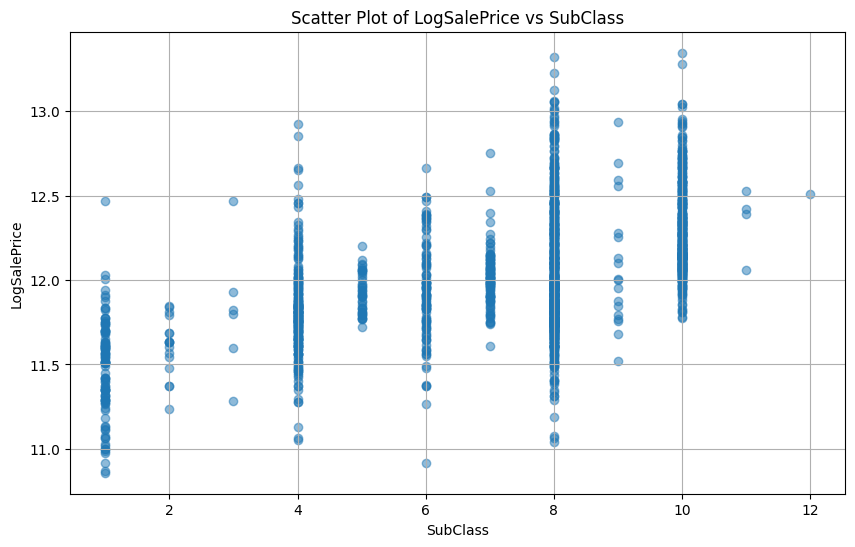

0.5415807347985909

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(data['SubClass'], data['LogSalePrice'], alpha=0.5)
plt.title('Scatter Plot of LogSalePrice vs SubClass')
plt.xlabel('SubClass')
plt.ylabel('LogSalePrice')
plt.grid(True)
plt.show()

data.LogSalePrice.corr(data.SubClass)

In [53]:
# Get the column names except SalePrice and LogSalePrice
columns_except_saleprice = [col for col in data.columns if col not in ['SalePrice', 'LogSalePrice']]

# Reorder the columns with SalePrice and LogSalePrice at the end
new_column_order = columns_except_saleprice + ['SalePrice', 'LogSalePrice']

# Create the new dataframe with the desired column order
data_reordered = data[new_column_order]

data = data_reordered

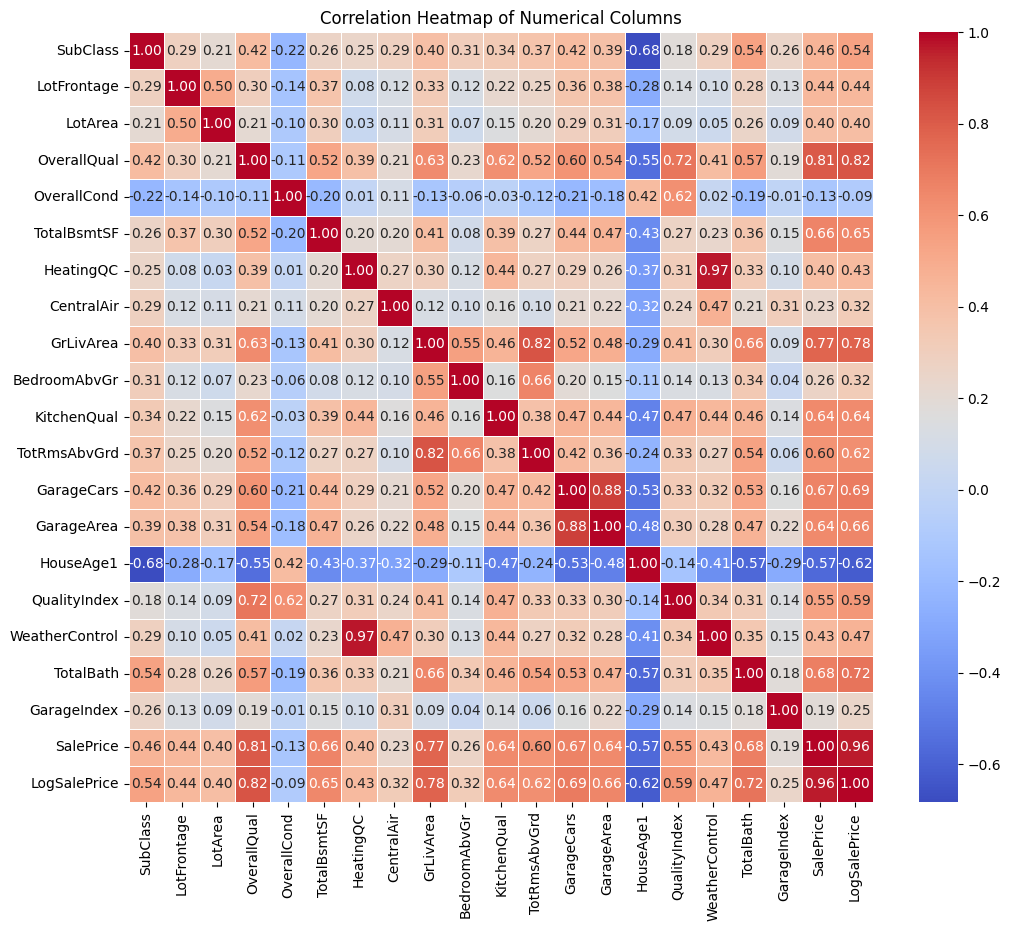

In [54]:
corr_matrix = data.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

#Choosing Relevant Variables

###Numerical analysis

In [55]:
data.select_dtypes(include=['int64', 'float64']).corr()['LogSalePrice'].abs().sort_values(ascending=False)

LogSalePrice      1.000000
SalePrice         0.962298
OverallQual       0.822814
GrLivArea         0.778546
TotalBath         0.720953
GarageCars        0.693253
GarageArea        0.657651
TotalBsmtSF       0.646426
KitchenQual       0.635286
TotRmsAbvGrd      0.622753
HouseAge1         0.619266
QualityIndex      0.586996
SubClass          0.541581
WeatherControl    0.465583
LotFrontage       0.437021
HeatingQC         0.427859
LotArea           0.404478
CentralAir        0.320052
BedroomAbvGr      0.317431
GarageIndex       0.249044
OverallCond       0.090090
Name: LogSalePrice, dtype: float64

###Categorical Variable

In [56]:
data.OverallCond.value_counts()

OverallCond
5    896
6    394
7    319
8    130
4     52
9     35
3     23
2      4
1      2
Name: count, dtype: int64

In [57]:
grouped_data = data.groupby('Zoning')['LogSalePrice'].apply(list)

# Perform ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

# Print ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

ANOVA Test Result:
F-statistic: 131.15731541979787
p-value: 5.351630146407665e-54


In [58]:
len(data)

1855

In [59]:
data.select_dtypes(include=['object']).columns.tolist()

['Zoning',
 'LotShape',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

In [60]:
data.Heating.value_counts()

Heating
GasA     1827
GasW       19
Grav        5
OthW        2
Wall        1
Floor       1
Name: count, dtype: int64

In [61]:
from scipy.stats import f_oneway

# Get list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Dictionary to store ANOVA test results
anova_results = {}

# Perform ANOVA test for each categorical column
for column in categorical_columns:
    # Group LogSalePrice by column categories
    grouped_data = data.groupby(column)['LogSalePrice'].apply(list)

    # Exclude categories with only one sample
    grouped_data = grouped_data[grouped_data.apply(len) > 1]

    if len(grouped_data) < 2:
        # Skip ANOVA test if there are less than two groups
        continue

    # Perform ANOVA test
    f_statistic, p_value = f_oneway(*grouped_data)

    # Store f-value and p-value in the dictionary
    anova_results[column] = (f_statistic, p_value)

# Sort the dictionary by p-values in descending order
sorted_anova_results = dict(sorted(anova_results.items(), key=lambda item: item[1][1], reverse=True))

# Print the sorted list of p-values and corresponding f-values
print("List of p-values and corresponding F-values in descending order:")
for column, (f_value, p_value) in sorted_anova_results.items():
    print(f"{column}: F-value = {f_value}, p-value = {p_value}")


List of p-values and corresponding F-values in descending order:
Heating: F-value = 8.293719635537471, p-value = 1.7651977091395448e-05
Functional: F-value = 9.009576283183621, p-value = 1.7960764922874552e-08
MasVnrType: F-value = 55.426109904561, p-value = 4.184358201911115e-24
Electrical: F-value = 73.8680256434271, p-value = 1.3660775440261314e-31
LotShape: F-value = 177.09477877044134, p-value = 1.1692134170455171e-38
Zoning: F-value = 131.15731541979787, p-value = 5.351630146407665e-54
GarageType: F-value = 132.3498114380126, p-value = 1.8737134892254675e-119
FireplaceQu: F-value = 155.30577450105199, p-value = 5.642020124759788e-138
Foundation: F-value = 159.65661134267722, p-value = 2.8248244159364846e-141
GarageFinish: F-value = 308.975495702394, p-value = 1.3153348781125166e-162
ExterQual: F-value = 471.2709471310773, p-value = 1.8330981088903542e-227
Neighborhood: F-value = 133.90078670866373, p-value = 0.0


# Taking 20 variables
1. OverallQual       0.821447
2. GrLivArea         0.777048
3. TotalBath         0.720871
4. GarageCars        0.693095
5. GarageArea        0.657765
6. TotalBsmtSF       0.642236
7. KitchenQual       0.635747
8. TotRmsAbvGrd      0.623193
9. HouseAge1         0.618397
10. SubClass          0.541488
11. LotFrontage       0.471157
12. WeatherControl    0.464312
13. Functional: p-value = 1.7960764922874552e-08
14. Electrical: p-value = 1.3660775440261314e-31
15. LotShape: p-value = 1.1692134170455171e-38
16. Zoning: p-value = 5.351630146407665e-54
17. ExterQual: p-value = 1.8330981088903542e-227
18. Neighborhood: p-value = 0.0

#Dropping all other columns

In [62]:
# List of columns to keep
columns_to_keep = [
    'OverallQual', 'GrLivArea', 'TotalBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF','OverallCond',
    'KitchenQual', 'TotRmsAbvGrd', 'HouseAge1', 'SubClass', 'LotFrontage', 'WeatherControl',
    'Functional', 'Electrical', 'LotShape', 'Zoning', 'ExterQual', 'Neighborhood', 'LogSalePrice', 'SalePrice', 'HeatingQC', 'Foundation', 'FireplaceQu', 'GarageFinish'
]

# Drop columns not in the list
data = data[columns_to_keep]

In [63]:
data.columns

Index(['OverallQual', 'GrLivArea', 'TotalBath', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'OverallCond', 'KitchenQual', 'TotRmsAbvGrd',
       'HouseAge1', 'SubClass', 'LotFrontage', 'WeatherControl', 'Functional',
       'Electrical', 'LotShape', 'Zoning', 'ExterQual', 'Neighborhood',
       'LogSalePrice', 'SalePrice', 'HeatingQC', 'Foundation', 'FireplaceQu',
       'GarageFinish'],
      dtype='object')

In [64]:
data.isnull().sum().to_dict()

{'OverallQual': 0,
 'GrLivArea': 0,
 'TotalBath': 0,
 'GarageCars': 0,
 'GarageArea': 0,
 'TotalBsmtSF': 0,
 'OverallCond': 0,
 'KitchenQual': 0,
 'TotRmsAbvGrd': 0,
 'HouseAge1': 0,
 'SubClass': 0,
 'LotFrontage': 0,
 'WeatherControl': 0,
 'Functional': 0,
 'Electrical': 0,
 'LotShape': 0,
 'Zoning': 0,
 'ExterQual': 0,
 'Neighborhood': 0,
 'LogSalePrice': 0,
 'SalePrice': 0,
 'HeatingQC': 0,
 'Foundation': 0,
 'FireplaceQu': 0,
 'GarageFinish': 0}

In [65]:
data.to_excel('/content/drive/MyDrive/CleanData6.xlsx', index=False)